## Assignment: Numerical Preprocessing & Visualization on the Diabetes Dataset

- **Dataset**: Diabetes.csv
- **Objective**:
To understand, clean, preprocess, impute, scale, and visualize numerical features using standard data preprocessing techniques in Python.


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## PART 1: Data Understanding (Exploratory Analysis)

In [89]:
df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [90]:
df.shape

(768, 9)

In [91]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    float64
 1   Glucose                   722 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             726 non-null    float64
 4   Insulin                   735 non-null    float64
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  734 non-null    float64
 7   Age                       735 non-null    float64
 8   Outcome                   739 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [93]:
df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,728.0,3.912088,3.382204,0.000,1.00000,3.000,6.00000,17.00
Glucose,722.0,120.671745,31.982858,0.000,99.00000,117.000,140.75000,199.00
BloodPressure,735.0,68.927891,19.590744,0.000,62.00000,72.000,80.00000,122.00
SkinThickness,726.0,20.632231,16.012616,0.000,0.00000,23.000,32.00000,99.00
Insulin,735.0,80.268027,116.198612,0.000,0.00000,29.000,130.00000,846.00
BMI,729.0,32.028807,7.904681,0.000,27.30000,32.000,36.60000,67.10
DiabetesPedigreeFunction,734.0,0.467578,0.325979,0.078,0.23825,0.368,0.62275,2.42
Age,735.0,33.308844,11.727195,21.000,24.00000,29.000,41.00000,81.00
Outcome,739.0,0.341001,0.474367,0.000,0.00000,0.000,1.00000,1.00


In [95]:
for col in df.columns:
    if col == 'Pregnancies' or col == 'Outcome' or col == 'DiabetesPedigreeFunction' or col == 'Age':
        pass
    else:
        df[col]=np.where(df[col].values==0,np.nan,df[col].values)

In [97]:
df.isnull().sum()

Pregnancies                  40
Glucose                      51
BloodPressure                68
SkinThickness               256
Insulin                     392
BMI                          49
DiabetesPedigreeFunction     34
Age                          33
Outcome                      29
dtype: int64

### Observation

- Name of the Dataset : diabetes_data.csv
- Shape of the Dataset : (768, 9)
- Datatypes : All columns are numerical (float64)
- Null values : All columns contains null values

### All Columns need cleaning and preprocessing

### Visualization before Imputation

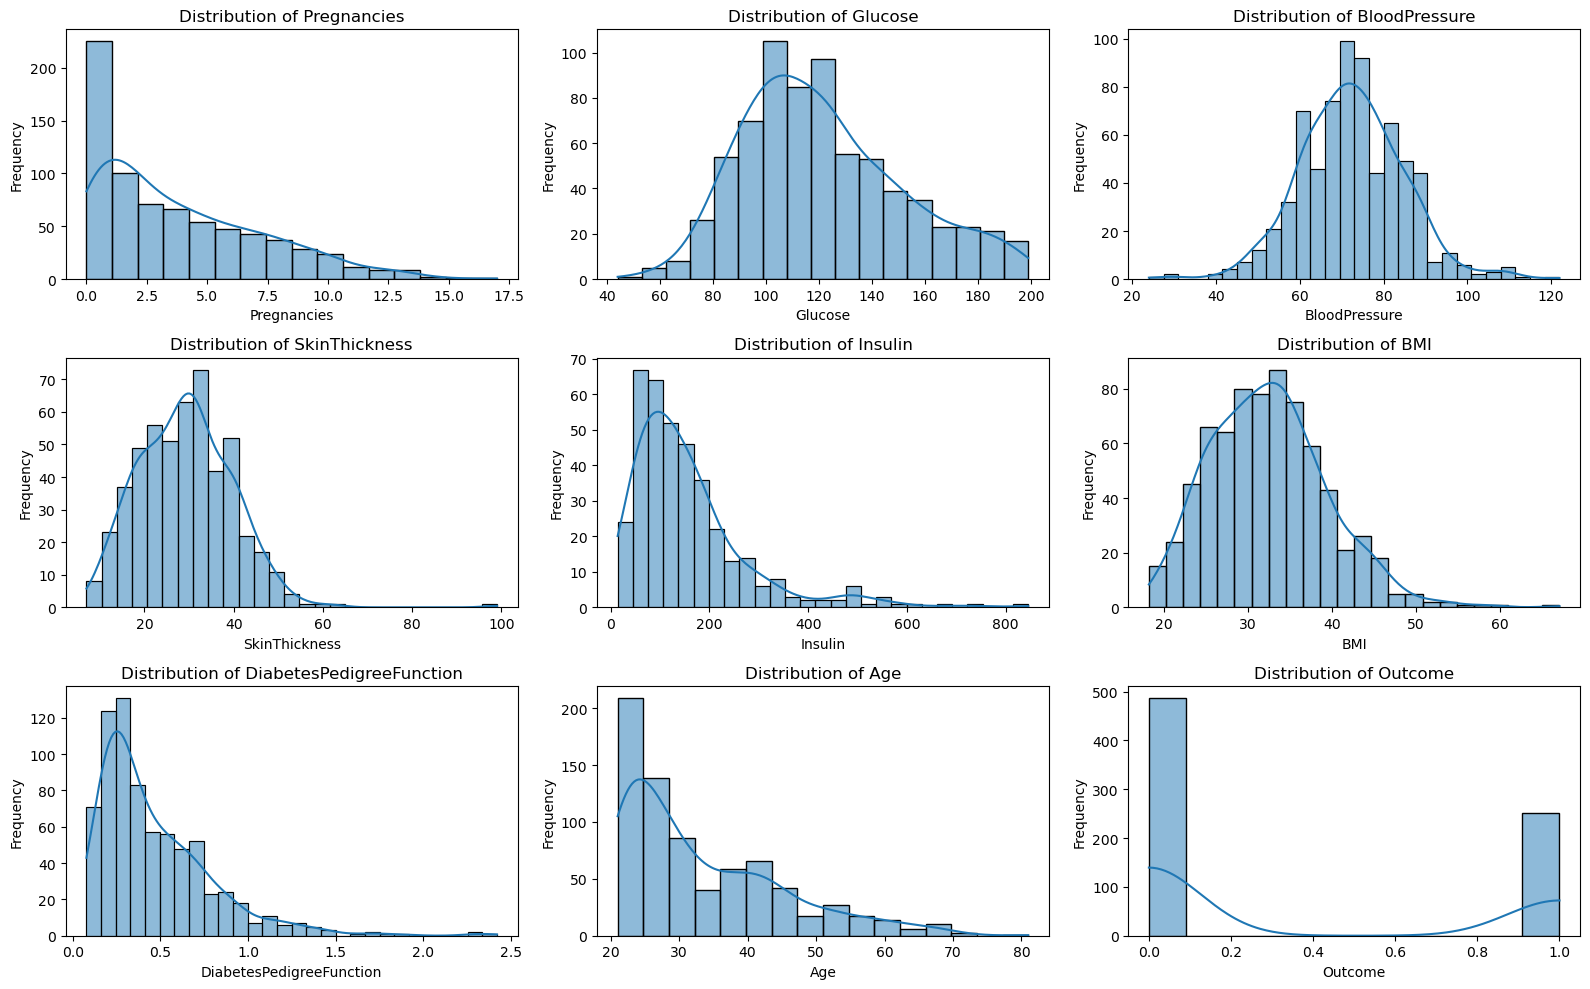

In [98]:
plt.figure(figsize=(16, 10))

for idx, col in enumerate(df.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.histplot(data=df, x=col, kde=True, fill=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Observation

- **Pregnancies** : The data in this column is Right-skew.It has Outliers.we use median for imputation.
- **Glucose** : The data in this column is Left-skew.It has Outliers.we use median for imputation.
- **BloodPressure** : The data in this column is Left-skew.It has Outliers.we use median for imputation.
- **SkinThickness** : The data in this column is Right-skew.It has Outliers.we use median for imputation.
- **Insulin** : The data in this column is Right-skew.It has Outliers.we use median for imputation.
- **DiabetPedigreeFunction** : The data in this column is Right-skew.It has Outliers.we use median for imputation.
- **Age** : The data in this column is Right-skew.It has Outliers.we use median for imputation.
- **Outcome** : The data in this column is Right-skew.It has Outliers.we use median for imputation.
- **BMI** : The data is norimally distributed.so it has no outliers. we use mean for imputation

In [99]:
for col in df.columns:
    if col == "Outcome":
        pass
    else:
        print(f'{col} skewness value: {round(df[col].skew(),2)}')

Pregnancies skewness value: 0.88
Glucose skewness value: 0.54
BloodPressure skewness value: 0.13
SkinThickness skewness value: 0.71
Insulin skewness value: 2.16
BMI skewness value: 0.6
DiabetesPedigreeFunction skewness value: 1.86
Age skewness value: 1.11


In [100]:
print(df.skew())

Pregnancies                 0.877842
Glucose                     0.536126
BloodPressure               0.132444
SkinThickness               0.714286
Insulin                     2.159211
BMI                         0.600498
DiabetesPedigreeFunction    1.859269
Age                         1.113181
Outcome                     0.672181
dtype: float64


## PART 2: Missing Value Imputation (Mean, Median, Mode)

In [101]:
for col in df.columns:
    if col == 'Outcome':
        pass
    elif col == 'Glucose' and col == 'BloodPressure':
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].median())

In [102]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                     29
dtype: int64

## PART 3: Visualizing Before & After Imputation

In [103]:
df.skew()

Pregnancies                 0.938643
Glucose                     0.583948
BloodPressure               0.147117
SkinThickness               0.903523
Insulin                     3.460924
BMI                         0.628226
DiabetesPedigreeFunction    1.930110
Age                         1.174095
Outcome                     0.672181
dtype: float64

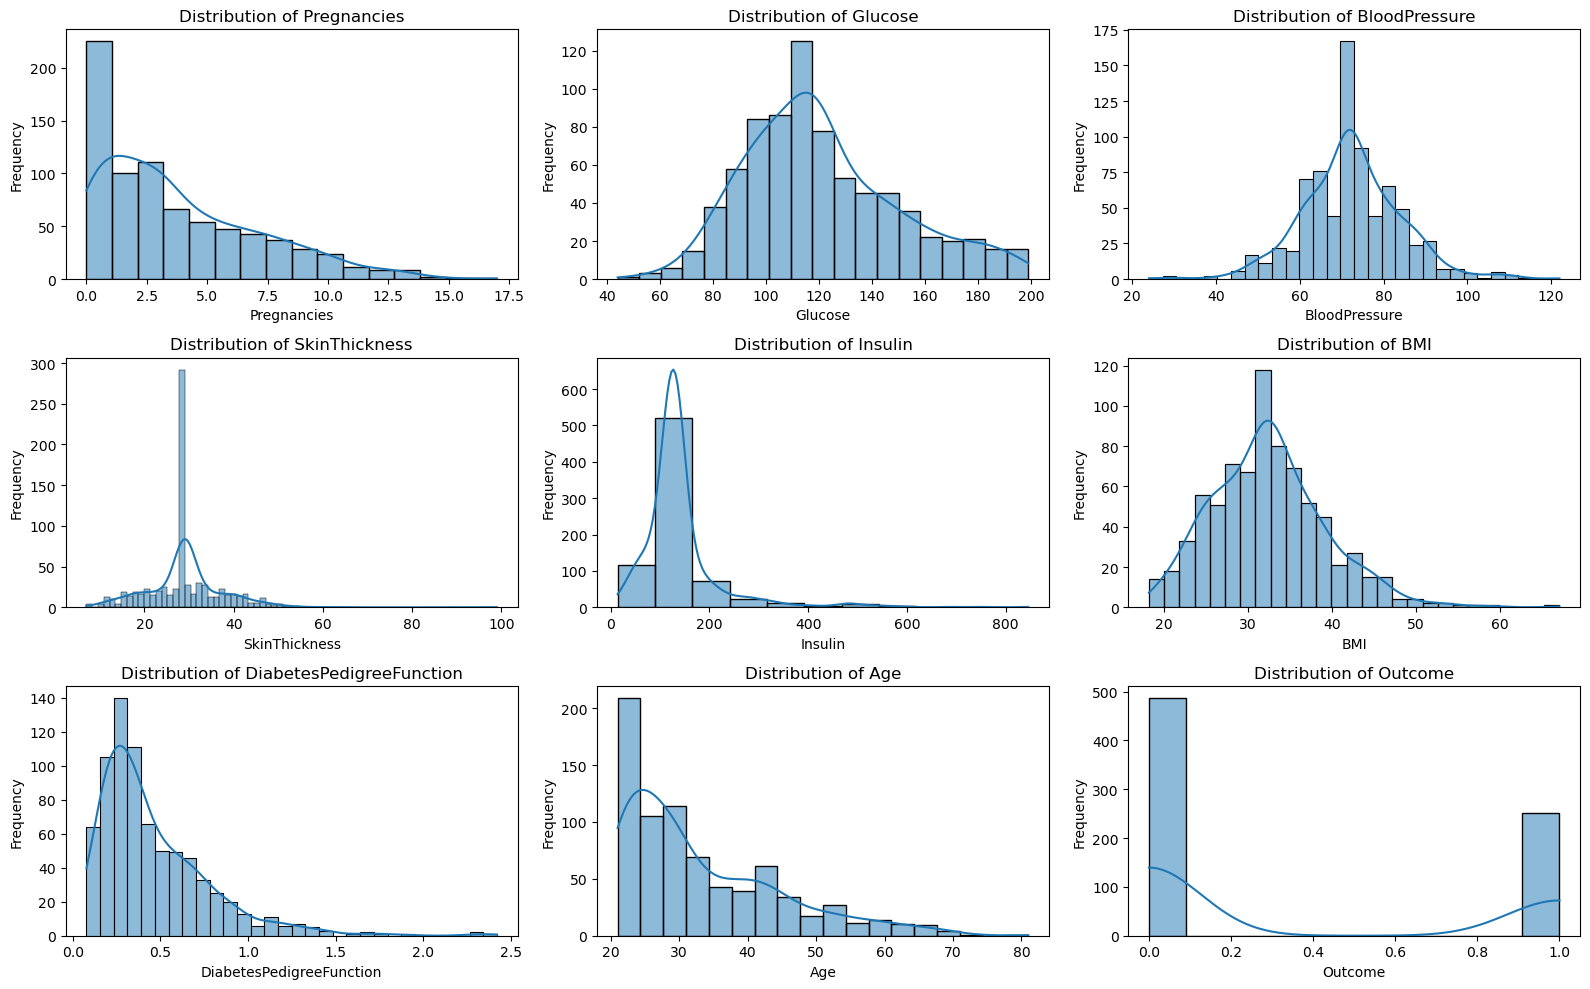

In [104]:
plt.figure(figsize=(16, 10))

for idx, col in enumerate(df.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.histplot(data=df, x=col, kde=True, fill=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Observation

- Before Imputation and after Imputation their is little bit change in the distribution of data.
- The imputation techniques used not fixed the outliers.
- The imputations are choosed based on the distribution of the data in the columns.So,they are suitable

## PART 4: Data Scaling

## Apply the following scaling techniques:

- StandardScaler
- MinMaxScaler
- RobustScaler


In [105]:
df = df.drop('Outcome',axis =1)

In [106]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Using StandardScaler

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in df.columns:
    df[[col]] = scaler.fit_transform(df[[col]])

In [113]:
df.to_csv('StandardScaler.csv',index = False)

In [114]:
standard_scalar_df = pd.read_csv('StandardScaler.csv')
standard_scalar_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647700,0.910187,-0.028887,0.678262,-0.172073,0.169129,0.513379,1.467770
1,-0.868866,-1.230513,-0.536938,-0.019846,-0.172073,-0.037987,-0.351493,-0.184703
2,1.254327,2.099465,-0.706288,-0.019846,-0.172073,-1.354650,0.654391,-0.097731
3,-0.868866,-1.094596,-0.536938,-0.717955,-0.559891,-0.644539,-0.928075,-1.054425
4,-1.172180,0.536414,-2.738493,0.678262,0.309762,1.574556,5.718284,-0.010758
...,...,...,...,...,...,...,...,...
763,1.860954,-0.686843,0.309814,2.190831,0.450787,0.065571,-0.915541,2.598409
764,-0.262240,0.026723,-0.198237,-0.252549,-0.172073,0.642536,-0.385963,-0.532592
765,0.344387,-0.007256,-0.028887,-0.717955,-0.348354,-0.925625,-0.683655,-0.271675
766,-0.868866,0.162641,-1.044989,-0.019846,-0.172073,-0.348660,-0.357760,1.206853


### Using MinMaxScalar

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for col in df.columns:
    df[[col]] = scaler.fit_transform(df[[col]])

In [117]:
df.to_csv('MinMaxScaler.csv',index = False)

In [118]:
minmax_scalar_df = pd.read_csv('MinMaxScaler.csv')
minmax_scalar_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.135817,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.135817,0.286299,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.135817,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.176471,0.503226,0.469388,0.217391,0.135817,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.239130,0.135817,0.243354,0.115713,0.433333


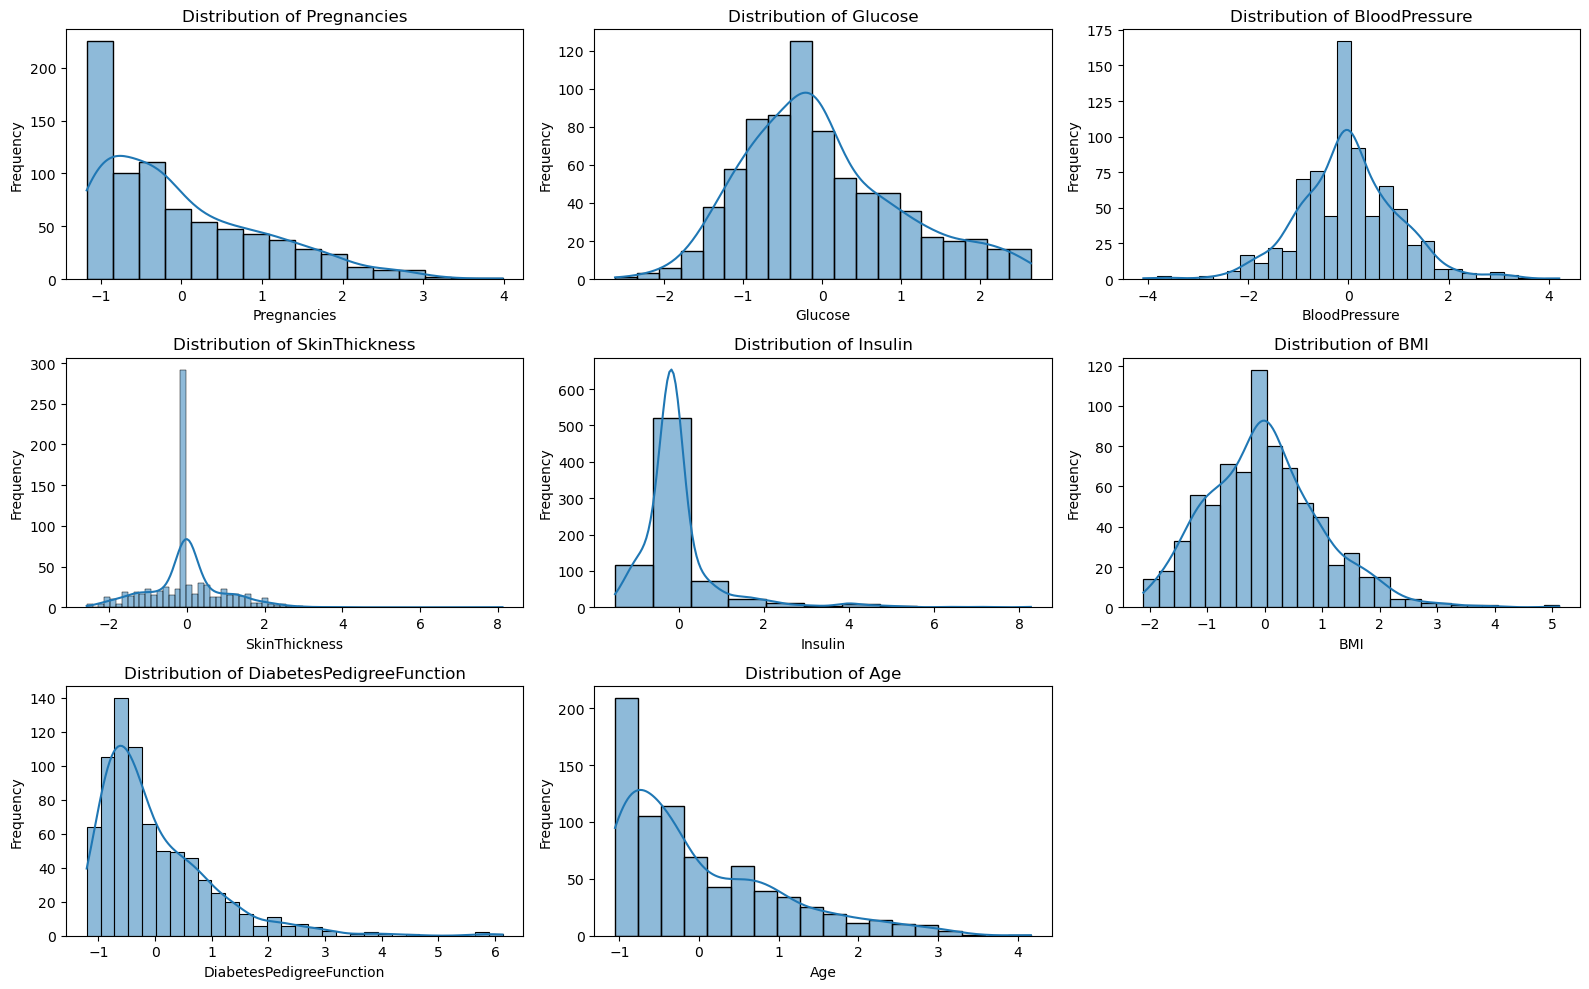

In [115]:
plt.figure(figsize=(16, 10))

for idx, col in enumerate(standard_scalar_df.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.histplot(data=standard_scalar_df, x=col, kde=True, fill=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


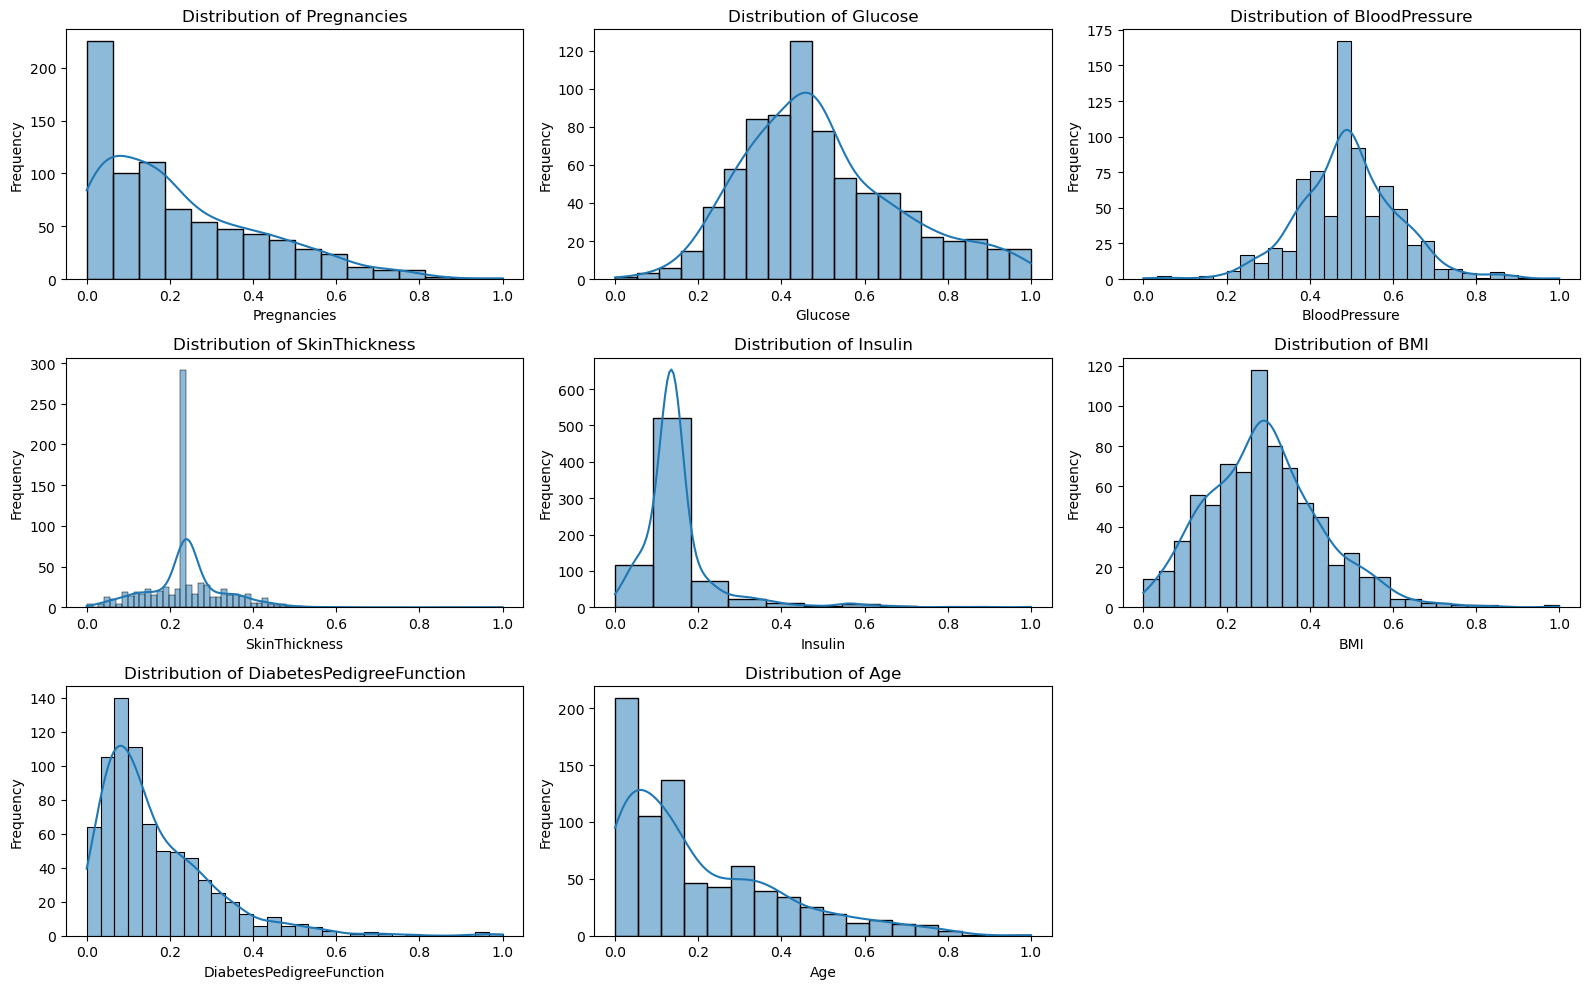

In [119]:
plt.figure(figsize=(16, 10))

for idx, col in enumerate(minmax_scalar_df.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.histplot(data=minmax_scalar_df, x=col, kde=True, fill=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Using RobustScaler

In [120]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

for col in df.columns:
    df[[col]] = scaler.fit_transform(df[[col]])

In [121]:
df.to_csv('RobustScaler.csv',index=False)

In [122]:
robust_scaler_df = pd.read_csv('RobustScaler.csv')
robust_scaler_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.810458,0.000000,1.000000,0.000000,0.162791,0.719444,1.3125
1,-0.4,-0.836601,-0.400000,0.000000,0.000000,0.000000,-0.047222,0.1250
2,1.0,1.725490,-0.533333,0.000000,0.000000,-1.034884,0.844444,0.1875
3,-0.4,-0.732026,-0.400000,-1.000000,-0.039663,-0.476744,-0.558333,-0.5000
4,-0.6,0.522876,-2.133333,1.000000,0.049279,1.267442,5.333333,0.2500
...,...,...,...,...,...,...,...,...
763,1.4,-0.418301,0.266667,3.166667,0.063702,0.081395,-0.547222,2.1250
764,0.0,0.130719,-0.133333,-0.333333,0.000000,0.534884,-0.077778,-0.1250
765,0.4,0.104575,0.000000,-1.000000,-0.018029,-0.697674,-0.341667,0.0625
766,-0.4,0.235294,-0.800000,0.000000,0.000000,-0.244186,-0.052778,1.1250


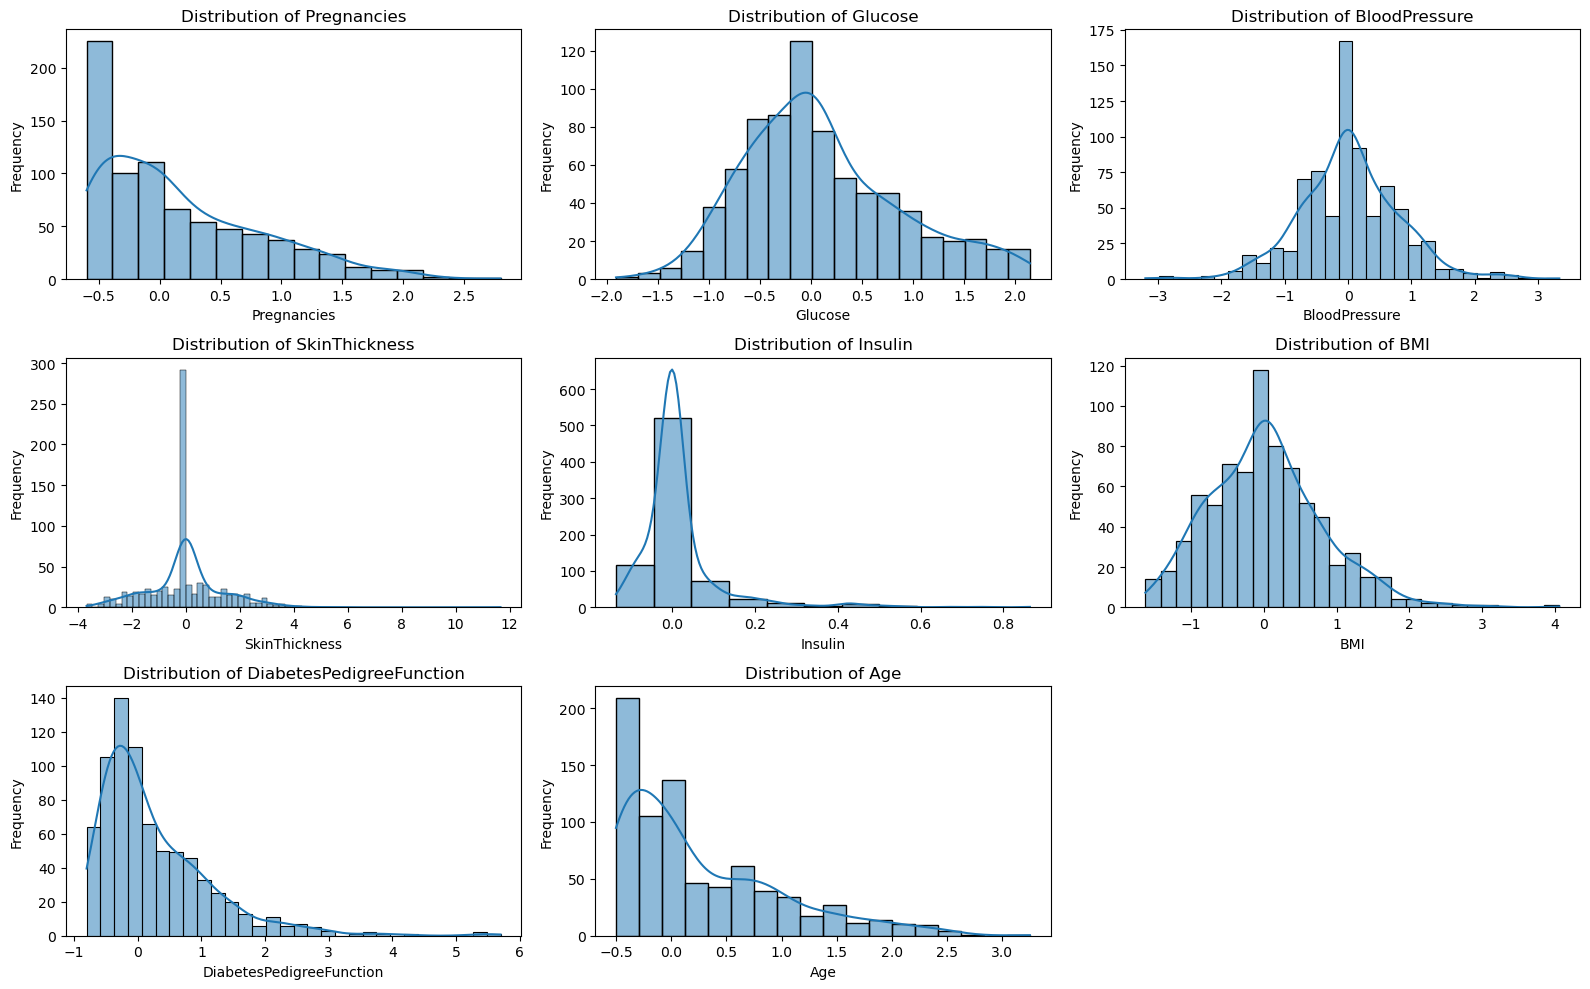

In [124]:
plt.figure(figsize=(16, 10))

for idx, col in enumerate(robust_scaler_df.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.histplot(data=robust_scaler_df, x=col, kde=True, fill=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
